# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [1]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [14]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soupmovie=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Movie URL's**

In [15]:
# Write Your Code here
itemsmovie = soupmovie.find_all('div', class_='title-list-grid__item')

# Extract the movie links
movie_links = [item.find('a')['href'] for item in itemsmovie][:50]

# Print the movie links
print(movie_links)

['/in/movie/animal-2022', '/in/movie/salaar', '/in/movie/12th-fail', '/in/movie/sam-bahadur', '/in/movie/aquaman-and-the-lost-kingdom', '/in/movie/hanu-man', '/in/movie/dunki', '/in/movie/oppenheimer', '/in/movie/ssmb-28', '/in/movie/nani30', '/in/movie/devil-2023', '/in/movie/sapta-sagaradaache-ello-side-b', '/in/movie/neru', '/in/movie/the-marvels', '/in/movie/the-kerala-story', '/in/movie/fighter-2022', '/in/movie/killers-of-the-flower-moon', '/in/movie/anyone-but-you', '/in/movie/captain-miller', '/in/movie/parking-2023', '/in/movie/mission-impossible-7', '/in/movie/jawan', '/in/movie/tiger-3', '/in/movie/the-beekeeper-2024', '/in/movie/migration', '/in/movie/guthlee-ladoo', '/in/movie/anatomie-dune-chute', '/in/movie/society-of-the-snow', '/in/movie/barbie-2023', '/in/movie/lift-0', '/in/movie/ayalaan', '/in/movie/saindhav', '/in/movie/poor-things', '/in/movie/joram', '/in/movie/saltburn', '/in/movie/past-lives', '/in/movie/kaathal-the-core', '/in/movie/talk-to-me-2022', '/in/movi

## **Scrapping Movie Title**

In [16]:
# Write Your Code here
movie_title = [item.find('img')['alt'] for item in itemsmovie][:50]
print(movie_title)

['Animal', 'Salaar', '12th Fail', 'Sam Bahadur', 'Aquaman and the Lost Kingdom', 'Hanu-Man', 'Dunki', 'Oppenheimer', 'Guntur Kaaram', 'Hi Nanna', 'Devil', 'Sapta Sagaradaache Ello: Side B', 'Neru', 'The Marvels', 'The Kerala Story', 'Fighter', 'Killers of the Flower Moon', 'Anyone But You', 'Captain Miller', 'Parking', 'Mission: Impossible - Dead Reckoning Part One', 'Jawan', 'Tiger 3', 'The Beekeeper', 'Migration', 'Guthlee Ladoo', 'Anatomy of a Fall', 'Society of the Snow', 'Barbie', 'Lift', 'Ayalaan', 'Saindhav', 'Poor Things', 'Joram', 'Saltburn', 'Past Lives', 'Kaathal – The Core', 'Talk to Me', 'Leo', 'Interstellar', 'Joe', '365 Days', 'Dune', 'Pindam', '777 Charlie', "Harry Potter and the Philosopher's Stone", 'Merry Christmas', 'Wonka', 'Dada', 'Mangalavaaram']


## **Scrapping release Year**

In [17]:
# Write Your Code here
base_url = "https://www.justwatch.com"
release_years = []
for movie_link in movie_links:
  full_url = base_url + movie_link

  response = requests.get(full_url)
  soup1 = BeautifulSoup(response.text, 'html.parser')

  release_year_element = soup1.find('div', class_ = 'title-block')
  release_year_str = release_year_element.find_next('span').text.strip()
  release_year = int(release_year_str.strip('()'))
  release_years.append(release_year)

print(release_years)

[2023, 2023, 2023, 2023, 2023, 2024, 2023, 2023, 2024, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2023, 2023, 2024, 2023, 2023, 2023, 2023, 2024, 2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2014, 2023, 2020, 2021, 2023, 2022, 2001, 2024, 2023, 2023, 2023]


## **Scrapping Genres**

In [18]:
# Write Your Code here
movie_genres = []
for movie_link in movie_links:
    full_url = base_url + movie_link

    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    # Find the div with class "detail-infos" containing genres
    genres_element = soup1.find('h3', string ='Genres')

    # Extract the genres from the div
    genres_value = genres_element.find_next_sibling('div', class_='detail-infos__value').text.strip()

    movie_genres.append(genres_value)

print(movie_genres)


['Action & Adventure, Drama, Crime, Mystery & Thriller', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama', 'War & Military, Drama, History', 'Action & Adventure, Fantasy, Science-Fiction', 'Comedy, Fantasy, Action & Adventure', 'Comedy, Drama', 'Drama, History', 'Action & Adventure, Drama, Kids & Family', 'Drama, Romance, Kids & Family', 'Mystery & Thriller, Action & Adventure, Drama', 'Romance, Drama', 'Mystery & Thriller, Drama', 'Science-Fiction, Action & Adventure, Fantasy', 'Drama', 'Action & Adventure, Mystery & Thriller, War & Military', 'Crime, History, Drama, Romance, Western', 'Comedy, Romance', 'Mystery & Thriller, Action & Adventure, Drama', 'Mystery & Thriller, Drama', 'Action & Adventure, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure', 'Action & Adventure, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure', 'Action & Adventure, Comedy, Kids & Family, Animation, Fantasy', 'Drama', 'Mystery & Thriller, Crime, Drama', 'Drama, Mystery 

## **Scrapping IMBD Rating**

In [37]:
# Write Your Code here
movie_ratings = []
for movie_link in movie_links:
    full_url = base_url + movie_link

    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    imdb_rating_element = soup1.find('img', {'alt': 'IMDB'})
    if imdb_rating_element:
      imdb_rating = imdb_rating_element.find_next('span').text.strip()
      movie_ratings.append(float(imdb_rating.split()[0]))
    else:
      movie_ratings.append(None)

print(movie_ratings)

[6.4, 6.5, 9.1, 7.9, 5.7, 8.5, 7.2, 8.4, 5.7, 8.2, 6.7, 8.1, 7.6, 5.6, 7.1, 7.4, 7.7, 6.5, 7.0, 7.9, 7.7, 7.0, 5.8, 6.4, 6.7, 7.8, 7.8, 7.9, 6.9, 5.5, 6.2, 5.1, None, 6.8, 7.0, 7.9, 7.6, 7.1, 7.2, 8.7, 7.6, 3.3, 8.0, 7.9, 8.8, 7.6, 7.8, 7.1, 8.2, 6.7]


## **Scrapping Runtime/Duration**

In [20]:
# Write Your Code here
runtime = []
for movie_link in movie_links:
    full_url = base_url + movie_link
    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    runtime_element = soup1.find('h3', string ='Runtime')
    runtime_value = runtime_element.find_next_sibling('div', class_='detail-infos__value').text
    runtime.append(runtime_value)

print(runtime)

['3h 21min', '2h 55min', '2h 26min', '2h 30min', '2h 4min', '2h 39min', '2h 40min', '3h 1min', '2h 39min', '2h 35min', '2h 24min', '2h 28min', '2h 30min', '1h 45min', '2h 18min', '2h 47min', '3h 26min', '1h 43min', '2h 37min', '2h 7min', '2h 44min', '2h 49min', '2h 35min', '1h 45min', '1h 23min', '1h 45min', '2h 32min', '2h 24min', '1h 54min', '1h 46min', '2h 35min', '2h 18min', '2h 21min', '1h 57min', '2h 11min', '1h 46min', '1h 52min', '1h 35min', '2h 43min', '2h 49min', '2h 27min', '1h 54min', '2h 35min', '2h 38min', '2h 46min', '2h 32min', '2h 24min', '1h 57min', '2h 15min', '2h 25min']


## **Scrapping Age Rating**

In [21]:
# Write Your Code here
AgeRating = []
for movie_link in movie_links:
    full_url = base_url + movie_link

    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')
    age_rating_element = soup1.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the age_rating_element is not None
    if age_rating_element:
        # Find the next sibling div which contains the age rating value
        age_rating_value = age_rating_element.find_next_sibling('div', class_='detail-infos__value').text.strip()
        AgeRating.append(age_rating_value)
    else:
        # If age rating information is not found, append None
        AgeRating.append(None)
print(AgeRating)

['A', 'A', None, 'UA', None, 'UA', None, 'UA', 'UA', 'U', None, 'UA', 'UA', None, 'A', 'UA', 'A', None, 'UA', 'UA', None, 'UA', None, None, None, None, None, None, 'UA', None, 'U', 'UA', None, 'UA', None, 'UA', 'UA', None, 'UA', None, None, None, 'UA', 'UA', 'UA', 'U', 'UA', 'U', 'U', None]


## **Fetching Production Countries Details**

In [22]:
# Write Your Code here
ProductionCountry = []
for movie_link in movie_links:
    full_url = base_url + movie_link

    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    production_country_element = soup1.find('h3', string=lambda text: text and "Production country" in text.strip())

    # Check if the production country element is found
    if production_country_element:
        # Find the next sibling div which contains the production country value
        production_country_value = production_country_element.find_next_sibling('div', class_='detail-infos__value').text

        ProductionCountry.append(production_country_value.strip())  # Remove leading and trailing spaces
    else:
        ProductionCountry.append("Not available")

print(ProductionCountry)

['India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'India', 'United States', 'India', 'India', 'United States', 'Australia, United States', 'India', 'India', 'United States', 'India', 'India', 'United Kingdom, United States', 'France, United States, Canada', 'India', 'France', 'Spain, United States', 'United Kingdom, United States', 'United States', 'India', 'India', 'United Kingdom, United States, Ireland', 'India', 'United States, United Kingdom', 'United States, South Korea', 'India', 'United Kingdom, Australia', 'India', 'United Kingdom, United States', 'India', 'Poland', 'United States', 'India', 'India', 'United Kingdom, United States', 'India', 'United Kingdom, United States', 'India', 'India']


## **Fetching Streaming Service Details**

In [23]:
# Write Your Code here
StreamingService = []
for movie_link in movie_links:
    full_url = base_url + movie_link
    response = requests.get(full_url)
    soup1 = BeautifulSoup(response.text, 'html.parser')

    streaming_div = soup1.find('div', class_='buybox-row stream')
    if streaming_div:
        # Extract platform information
        platform_links = streaming_div.find('a', class_='offer')
        platform_names = platform_links.find('img')['alt']
        StreamingService.append(platform_names)
    else:
        StreamingService.append(None)

print(StreamingService)

['Netflix', 'Netflix', 'Hotstar', 'Zee5', None, None, None, None, 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Hotstar', 'Hotstar', None, None, 'Apple TV Plus', None, 'Amazon Prime Video', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', None, None, 'Amazon Prime Video', None, 'Netflix', 'Jio Cinema', 'Netflix', 'Sun Nxt', 'Amazon Prime Video', None, None, None, 'Lionsgate Play', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', None, 'Netflix', None, 'Amazon Prime Video', 'Voot', 'Jio Cinema', None, None, 'Amazon Prime Video', 'Hotstar']


## **Now Creating Movies DataFrame**

In [38]:
# Write Your Code here
# pd.set_option('display.max_colwidth', None)  # Display full content of each column
# pd.set_option('display.max_rows', None)
moviedf = pd.DataFrame({'Movie Title': movie_title,'Movie Link':movie_links,'Release Year':release_years,'Movie Genres':movie_genres,'Movie Ratings':movie_ratings,'Runtime':runtime,'Age Rating':AgeRating,'Production Country':ProductionCountry,'Streaming Service':StreamingService})
moviedataframe = moviedf.to_string()
print(moviedataframe)

                                      Movie Title                                         Movie Link  Release Year                                                   Movie Genres  Movie Ratings   Runtime Age Rating                      Production Country   Streaming Service
0                                          Animal                              /in/movie/animal-2022          2023           Action & Adventure, Drama, Crime, Mystery & Thriller            6.4  3h 21min          A                                   India             Netflix
1                                          Salaar                                   /in/movie/salaar          2023           Action & Adventure, Crime, Drama, Mystery & Thriller            6.5  2h 55min          A                                   India             Netflix
2                                       12th Fail                                /in/movie/12th-fail          2023                                                          Drama 

## **Scraping TV  Show Data**

In [2]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
souptv=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Tv shows Url details**

In [3]:
# Write Your Code here
itemstv = souptv.find_all('div', class_='title-list-grid__item')

# Extract the movie links
tv_links = [item.find('a')['href'] for item in itemstv][:50]

# Print the movie links
print(tv_links)

['/in/tv-show/indian-police-force', '/in/tv-show/true-detective', '/in/tv-show/mirzapur', '/in/tv-show/jack-reacher', '/in/tv-show/game-of-thrones', '/in/tv-show/panchayat', '/in/tv-show/solo-leveling-2024', '/in/tv-show/death-and-other-details', '/in/tv-show/bigg-boss', '/in/tv-show/yellowstone', '/in/tv-show/the-legend-of-hanuman', '/in/tv-show/jujutsu-kaisen', '/in/tv-show/killer-soup', '/in/tv-show/mr-and-mrs-smith', '/in/tv-show/farzi', '/in/tv-show/maharani-2021', '/in/tv-show/the-last-of-us', '/in/tv-show/berlin', '/in/tv-show/superman-and-lois', '/in/tv-show/mastram', '/in/tv-show/the-bear', '/in/tv-show/paperhouse', '/in/tv-show/fargo', '/in/tv-show/monarch-legacy-of-monsters', '/in/tv-show/griselda', '/in/tv-show/the-freelancer', '/in/tv-show/masters-of-the-air', '/in/tv-show/ek-thi-begum', '/in/tv-show/marry-my-husband', '/in/tv-show/love-never-lies-poland', '/in/tv-show/my-demon', '/in/tv-show/aarya', '/in/tv-show/loki', '/in/tv-show/aashram', '/in/tv-show/halo', '/in/tv-sh

## **Fetching Tv Show Title details**

In [4]:
# Write Your Code here
tv_title = [item.find('img')['alt'] for item in itemstv][:50]
print(tv_title)

['Indian Police Force', 'True Detective', 'Mirzapur', 'Reacher', 'Game of Thrones', 'Panchayat', 'Solo Leveling', 'Death and Other Details', 'Bigg Boss', 'Yellowstone', 'The Legend of Hanuman', 'Jujutsu Kaisen', 'Killer Soup', 'Mr. & Mrs. Smith', 'Farzi', 'Maharani', 'The Last of Us', 'Berlin', 'Superman & Lois', 'Mastram', 'The Bear', 'Money Heist', 'Fargo', 'Monarch: Legacy of Monsters', 'Griselda', 'The Freelancer', 'Masters of the Air', 'Ek Thi Begum', 'Marry My Husband', 'Love Never Lies: Poland', 'My Demon', 'Aarya', 'Loki', 'Aashram', 'Halo', 'Succession', 'Scam 1992', 'Gandii Baat', 'Shark Tank India', 'The Railway Men - The Untold Story of Bhopal 1984', 'House', 'Breaking Bad', 'Expats', 'ted', 'Flames', 'Gullak', 'Percy Jackson and the Olympians', 'The Family Man', 'Taaza Khabar', 'Spartacus']


## **Fetching Release Year**

In [5]:
# Write Your Code here
base_url = "https://www.justwatch.com"
tv_release_years = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link

  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_release_year_element = soup2.find('div', class_ = 'title-block')
  tv_release_year_str = tv_release_year_element.find_next('span').text.strip()
  tv_release_year = int(tv_release_year_str.strip('()'))
  tv_release_years.append(tv_release_year)

print(tv_release_years)

[2024, 2014, 2018, 2022, 2011, 2020, 2024, 2024, 2006, 2018, 2021, 2020, 2024, 2024, 2023, 2021, 2023, 2023, 2021, 2020, 2022, 2017, 2014, 2023, 2024, 2023, 2024, 2020, 2024, 2022, 2023, 2020, 2021, 2020, 2022, 2018, 2020, 2018, 2021, 2023, 2004, 2008, 2024, 2024, 2018, 2019, 2023, 2019, 2023, 2010]


## **Fetching TV Show Genre Details**

In [6]:
# Write Your Code here
tv_genres = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link

  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

    # Find the div with class "detail-infos" containing genres
  tv_genres_element = soup2.find('h3', string ='Genres')

    # Extract the genres from the div
  tv_genres_value = tv_genres_element.find_next_sibling('div', class_='detail-infos__value').text.strip()

  tv_genres.append(tv_genres_value)

print(tv_genres)

['Action & Adventure, Crime', 'Drama, Mystery & Thriller, Crime', 'Crime, Action & Adventure, Mystery & Thriller, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Comedy, Drama', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Mystery & Thriller, Drama, Crime', 'Reality TV, Kids & Family', 'Drama, Western', 'Animation, Action & Adventure, Fantasy', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Comedy, Drama, Mystery & Thriller', 'Drama, Comedy, Action & Adventure, Mystery & Thriller, Crime', 'Crime, Drama, Mystery & Thriller', 'Drama', 'Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Science-Fiction, Drama, Action & Adventure, Romance', 'Drama, Comedy, Fantasy', 'Drama, Comedy', 'Action & Adventure, Crime, Drama, Mystery & Thriller, Made in Europe', 'Mystery & Thriller, Crime, Drama', 'Dram

## **Fetching IMDB Rating Details**

In [36]:
# Write Your Code here
tv_ratings = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link

  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_imdb_rating_element = soup2.find('img', {'alt': 'IMDB'})
  if tv_imdb_rating_element:
    tv_imdb_rating = tv_imdb_rating_element.find_next('span').text.strip()
    tv_ratings.append(float(tv_imdb_rating.split()[0]))
  else:
    tv_ratings.append(None)

print(tv_ratings)

[6.0, 8.9, 8.5, 8.1, 9.2, 8.9, 8.4, 7.0, 3.7, 8.7, 9.2, 8.6, 6.3, 6.9, 8.4, 7.9, 8.8, 7.0, 7.8, 7.1, 8.6, 8.2, 8.9, 7.0, 7.3, 8.1, 7.9, 8.6, 8.0, None, 7.8, 7.9, 8.2, 7.4, 7.2, 8.8, 9.3, 3.4, 8.7, 8.5, 8.7, 9.5, 5.9, 8.0, 8.9, 9.1, 7.2, 8.7, 8.1, 8.5]


## **Fetching Age Rating Details**

In [8]:
# Write Your Code here
TVAgeRating = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link

  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_age_rating_element = soup2.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the age_rating_element is not None
  if tv_age_rating_element:
    tv_age_rating_value = tv_age_rating_element.find_next_sibling('div', class_='detail-infos__value').text.strip()
    TVAgeRating.append(tv_age_rating_value)
  else:
    TVAgeRating.append(None)

print(TVAgeRating)

['A', 'U', None, 'A', 'U', None, None, None, None, None, None, None, None, None, None, 'UA', 'A', None, None, None, None, None, None, None, None, None, 'A', None, None, None, None, None, None, None, None, 'A', None, 'A', 'U', None, 'UA', 'U', None, None, None, None, None, None, None, None]


## **Fetching Production Country details**

In [9]:
# Write Your Code here
TVProductionCountry = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link
  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_production_country_element = soup2.find('h3', string=lambda text: text and "Production country" in text.strip())

    # Check if the production country element is found
  if tv_production_country_element:
    tv_production_country_value = tv_production_country_element.find_next_sibling('div', class_='detail-infos__value').text
    TVProductionCountry.append(tv_production_country_value.strip())
  else:
    TVProductionCountry.append("Not available")

print(TVProductionCountry)

['India', 'United States', 'India', 'United States', 'United States', 'India', 'Japan, South Korea', 'United States', 'India', 'United States', 'India', 'Japan', 'India', 'United States', 'India', 'India', 'United States', 'Spain', 'United States', 'India', 'United States', 'Spain', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'South Korea', 'Poland', 'South Korea', 'India', 'United States', 'India', 'United States', 'United States', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'India', 'India', 'United States']


## **Fetching Streaming Service details**

In [10]:
# Write Your Code here
TVStreamingService = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link
  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_streaming_div = soup2.find('div', class_='buybox-row stream')
  if tv_streaming_div:
    tv_platform_links = tv_streaming_div.find('a', class_='offer')
    tv_platform_names = tv_platform_links.find('img')['alt']
    TVStreamingService.append(tv_platform_names)
  else:
    TVStreamingService.append(None)

print(TVStreamingService)

['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Crunchyroll', 'Hotstar', 'Voot', 'Netflix', 'Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Sony Liv', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', None, 'Hotstar', 'Netflix', None, 'Apple TV Plus', 'Netflix', 'Hotstar', 'Apple TV Plus', 'MX Player', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Hotstar', 'Hotstar', 'MX Player', 'Voot', 'Jio Cinema', 'Sony Liv', 'Alt Balaji', 'Sony Liv', 'Netflix', 'Netflix', 'Netflix', 'Amazon Prime Video', None, 'Amazon Prime Video', 'Sony Liv', None, 'Amazon Prime Video', 'Hotstar', 'Lionsgate Play']


## **Fetching Duration Details**

In [11]:
# Write Your Code here
TVDuration = []
for tv_link in tv_links:
  tv_full_url = base_url + tv_link
  response = requests.get(tv_full_url)
  soup2 = BeautifulSoup(response.text, 'html.parser')

  tv_runtime_element = soup2.find('h3', string ='Runtime')
  tv_runtime_value = tv_runtime_element.find_next_sibling('div', class_='detail-infos__value').text
  TVDuration.append(tv_runtime_value)

print(TVDuration)

['38min', '1h 0min', '50min', '48min', '58min', '33min', '24min', '47min', '1h 15min', '50min', '21min', '23min', '50min', '49min', '56min', '44min', '58min', '48min', '42min', '28min', '33min', '50min', '52min', '46min', '55min', '50min', '52min', '30min', '1h 2min', '49min', '1h 6min', '46min', '49min', '43min', '51min', '1h 4min', '52min', '44min', '56min', '59min', '44min', '47min', '1h 10min', '41min', '31min', '29min', '39min', '45min', '29min', '54min']


## **Creating TV Show DataFrame**

In [47]:
# Write Your Code here
tvdf= pd.DataFrame({'TV Title':tv_title,'TV Link':tv_links,'TV Release Year':tv_release_years,'TV Genres':tv_genres,'TV Ratings':tv_ratings,'TV Age Rating':TVAgeRating,'TV Production Country':TVProductionCountry,'TV Streaming Service':TVStreamingService,'TV Duration':TVDuration,})
tvdataframe = tvdf.to_string()
print(tvdataframe)

                                             TV Title                                                      TV Link  TV Release Year                                                                        TV Genres  TV Ratings TV Age Rating TV Production Country TV Streaming Service TV Duration
0                                 Indian Police Force                              /in/tv-show/indian-police-force             2024                                                        Action & Adventure, Crime         6.0             A                 India   Amazon Prime Video       38min
1                                      True Detective                                   /in/tv-show/true-detective             2014                                                 Drama, Mystery & Thriller, Crime         8.9             U         United States           Jio Cinema     1h 0min
2                                            Mirzapur                                         /in/tv-show/mirzapur    

## **Task 2 :- Data Filtering & Analysis**

In [83]:
# for movies
moviedf['Age Rating'] = moviedf['Age Rating'].fillna('UA')

In [84]:
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Title         50 non-null     object 
 1   Movie Link          50 non-null     object 
 2   Release Year        50 non-null     int64  
 3   Movie Genres        50 non-null     object 
 4   Movie Ratings       49 non-null     float64
 5   Runtime             50 non-null     object 
 6   Age Rating          50 non-null     object 
 7   Production Country  50 non-null     object 
 8   Streaming Service   33 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.6+ KB


In [41]:
moviedf.shape

(50, 9)

In [87]:
moviedf.duplicated().sum()

0

In [88]:
moviedf.isnull().sum()

Movie Title            0
Movie Link             0
Release Year           0
Movie Genres           0
Movie Ratings          1
Runtime                0
Age Rating             0
Production Country     0
Streaming Service     17
dtype: int64

In [45]:
moviedf.describe()

,Release Year,Movie Ratings
count,50.000000,49.000000
mean,2022.440000,7.169388
std,3.417601,1.076298
min,2001.000000,3.300000
25%,2023.000000,6.700000
50%,2023.000000,7.200000
75%,2023.000000,7.900000
max,2024.000000,9.100000


In [90]:
# for tv shows
tvdf['TV Age Rating'] = tvdf['TV Age Rating'].fillna('UA')

In [91]:
tvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TV Title               50 non-null     object 
 1   TV Link                50 non-null     object 
 2   TV Release Year        50 non-null     int64  
 3   TV Genres              50 non-null     object 
 4   TV Ratings             49 non-null     float64
 5   TV Age Rating          50 non-null     object 
 6   TV Production Country  50 non-null     object 
 7   TV Streaming Service   46 non-null     object 
 8   TV Duration            50 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.6+ KB


In [50]:
tvdf.duplicated().sum()

0

In [92]:
tvdf.isnull().sum()

TV Title                 0
TV Link                  0
TV Release Year          0
TV Genres                0
TV Ratings               1
TV Age Rating            0
TV Production Country    0
TV Streaming Service     4
TV Duration              0
dtype: int64

In [52]:
tvdf.describe()

,TV Release Year,TV Ratings
count,50.000000,49.000000
mean,2019.840000,7.914286
std,4.824935,1.246829
min,2004.000000,3.400000
25%,2018.250000,7.300000
50%,2021.000000,8.200000
75%,2023.000000,8.700000
max,2024.000000,9.500000


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [57]:
# Write Your Code here
#  Mean IMDB Ratings for Movies
movie_na_rating = moviedf.dropna(subset=['Movie Ratings'])
movieIMDBratingMean = movie_na_rating['Movie Ratings'].mean()
print("Mean IMDB Ratings of Movies: ",movieIMDBratingMean)

#  Mean IMDB Ratings for TV Shows
tv_na_rating = tvdf.dropna(subset=['TV Ratings'])
tvIMDBratingMean = tv_na_rating['TV Ratings'].mean()
print("Mean IMDB Ratings of TV Shows: ",tvIMDBratingMean)

Mean IMDB Ratings of Movies:  7.169387755102041
Mean IMDB Ratings of TV Shows:  7.914285714285715


## **Analyzing Top Genres**

In [63]:
# for movie genres
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine text from all rows into a single string
text = ' '.join(moviedf['Movie Genres'])
# Generate word cloud
wordcloudmovie = WordCloud(width=800, height=400, background_color='white').generate(text)

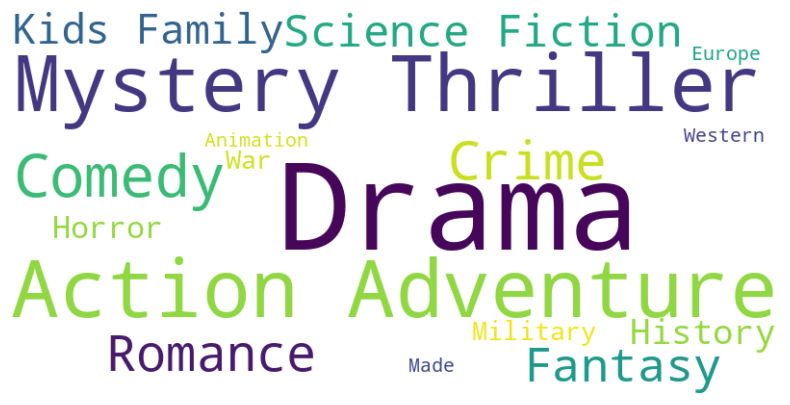

In [64]:
# Visualize word cloud for movie genres
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudmovie, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
# for TV Shows genres
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine text from all rows into a single string
text = ' '.join(tvdf['TV Genres'])
# Generate word cloud
wordcloudtv = WordCloud(width=800, height=400, background_color='white').generate(text)

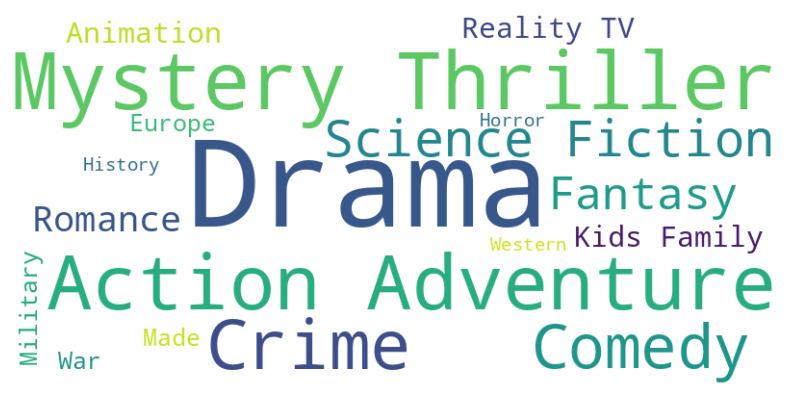

In [66]:
# Visualize word cloud for TV Shows Genres
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudtv, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [68]:
# for Movies Streaming Service
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# drop na from the Movie Streaming Service Column
movie_na_streaming = moviedf.dropna(subset=['Streaming Service'])
# Combine text from all rows into a single string
text = ' '.join(movie_na_streaming['Streaming Service'])
# Generate word cloud
wordcloudmoviestreaming = WordCloud(width=800, height=400, background_color='white').generate(text)


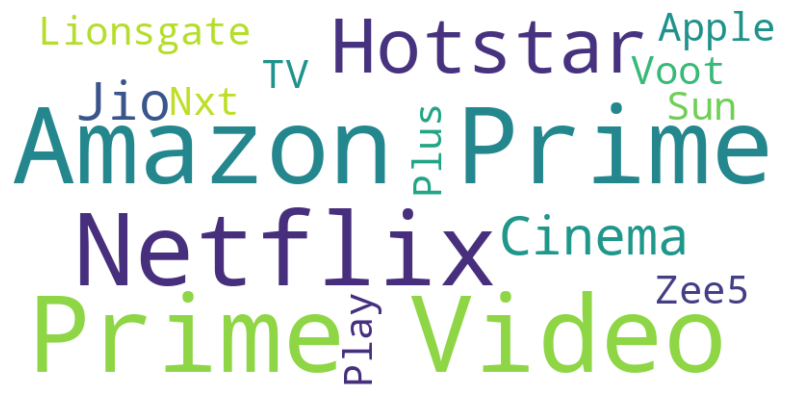

In [69]:
# Visualize word cloud for movie streaming service
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudmoviestreaming, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
# for TV Shows Streaming Service
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# drop na from the TV Streaming Service Column
tv_na_streaming = tvdf.dropna(subset=['TV Streaming Service'])
# Combine text from all rows into a single string
text = ' '.join(tv_na_streaming['TV Streaming Service'])
# Generate word cloud
wordcloudtvstreaming = WordCloud(width=800, height=400, background_color='white').generate(text)

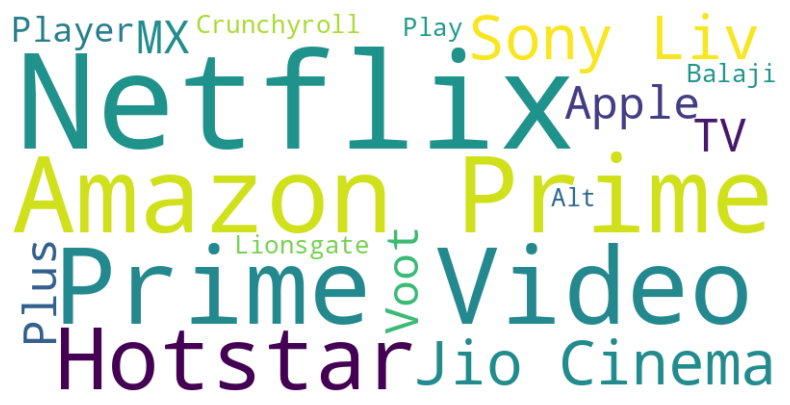

In [71]:
# Visualize word cloud for TV Shows Streaming Service
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudtvstreaming, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [93]:
#saving final Movie dataframe as Final Data in csv format
merged_df = pd.merge(moviedf, tvdf, left_index= True, right_index=True, how='outer')
# saving to csv
merged_df.to_csv('FINALDATA.csv',index=False)
print("DataFrame saved to 'FINALDATA.csv'")

DataFrame saved to 'FINALDATA.csv'


In [94]:
#saving filter data as Filter Data in csv format
merged_df = pd.merge(moviedf, tvdf, left_index= True, right_index=True, how='outer')
# filtering data by dropping null values
filtered_df = merged_df.dropna()
# saving to csv
filtered_df.to_csv('FILTERDATA.csv',index=False)
print("DataFrame saved to 'FILTERDATA.csv'")

DataFrame saved to 'FILTERDATA.csv'


# **Dataset Drive Link (View Access with Anyone) -**
FinalData:- https://drive.google.com/file/d/1c_6qCQdQV8jJ9-GKesjnIolk0dO_Cfg0/view?usp=sharing

FilterData:- https://drive.google.com/file/d/1jIPgHyGOO3gKFPIsJ0C1S9ms5aa5xSAI/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***